<a href="https://colab.research.google.com/github/Tarunparkar/ML/blob/main/ML7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Cost: 2.8052
Epoch 100, Cost: 0.6514
Epoch 200, Cost: 0.3566
Epoch 300, Cost: 0.3106
Epoch 400, Cost: 0.2991
Epoch 500, Cost: 0.2932
Epoch 600, Cost: 0.2886
Epoch 700, Cost: 0.2848
Epoch 800, Cost: 0.2816
Epoch 900, Cost: 0.2789

Final Parameters (theta):
[ 2.06846887  0.81659877  0.17689017 -0.12729893  0.14127008  0.0166395
 -0.04392099 -0.48604502 -0.44967077]


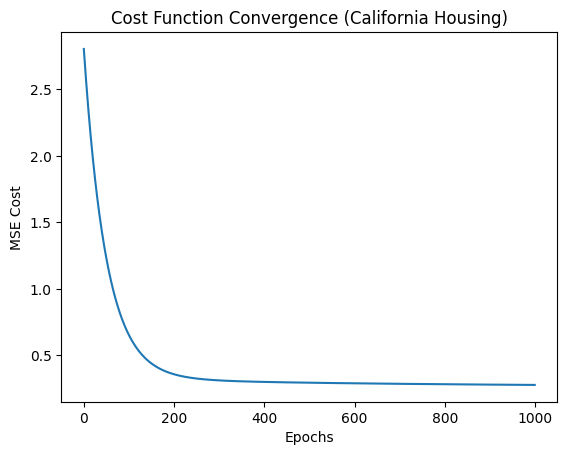

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# -------------------------
# Step 1: Load Dataset
# -------------------------
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target  # House prices in $100,000s

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term (intercept)
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# -------------------------
# Step 2: Gradient Descent Setup
# -------------------------
def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_list = []

    for i in range(epochs):
        y_pred = X.dot(theta)
        error = y_pred - y

        # Gradient
        grad = (1/m) * X.T.dot(error)
        theta -= lr * grad

        # Cost (MSE)
        cost = (1/(2*m)) * np.sum(error ** 2)
        cost_list.append(cost)

        if i % 100 == 0:
            print(f"Epoch {i}, Cost: {cost:.4f}")

    return theta, cost_list

# -------------------------
# Step 3: Run Gradient Descent
# -------------------------
theta, cost_history = gradient_descent(X_scaled, y, lr=0.01, epochs=1000)

print("\nFinal Parameters (theta):")
print(theta)

# -------------------------
# Step 4: Visualization
# -------------------------
plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("MSE Cost")
plt.title("Cost Function Convergence (California Housing)")
plt.show()
